In [1]:
!pip install stable-baselines3 gym-anytrading gym==0.25.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.0/180.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 6.0 MB/s eta 0:00:00


In [2]:
# Gym Stuff
import gym
import gym_anytrading

# Stable base line rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# processing libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,05/04/2023,19.25,19.48,18.92,19.35,"2,041,842"
1,05/03/2023,18.56,19.20,18.53,18.90,"3,184,021"
2,05/02/2023,18.45,18.58,18.06,18.58,"1,918,257"
3,05/01/2023,19.16,19.25,18.46,18.55,"2,356,640"
4,04/28/2023,18.92,19.72,18.88,19.29,"2,836,576"


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [6]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-04,19.25,19.48,18.92,19.35,"2,041,842"
2023-05-03,18.56,19.20,18.53,18.90,"3,184,021"
2023-05-02,18.45,18.58,18.06,18.58,"1,918,257"
2023-05-01,19.16,19.25,18.46,18.55,"2,356,640"
2023-04-28,18.92,19.72,18.88,19.29,"2,836,576"


In [7]:
env = gym.make('stocks-v0' , df=df , frame_bound=(5,100) , window_size=5)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [8]:
env.signal_features

array([[19.35,  0.  ],
       [18.9 , -0.45],
       [18.58, -0.32],
       [18.55, -0.03],
       [19.29,  0.74],
       [18.94, -0.35],
       [18.65, -0.29],
       [19.  ,  0.35],
       [19.93,  0.93],
       [20.49,  0.56],
       [20.22, -0.27],
       [21.31,  1.09],
       [21.61,  0.3 ],
       [22.28,  0.67],
       [22.46,  0.18],
       [22.55,  0.09],
       [22.26, -0.29],
       [22.69,  0.43],
       [22.37, -0.32],
       [22.4 ,  0.03],
       [22.07, -0.33],
       [22.35,  0.28],
       [23.17,  0.82],
       [23.02, -0.15],
       [22.5 , -0.52],
       [22.46, -0.04],
       [23.15,  0.69],
       [23.  , -0.15],
       [23.98,  0.98],
       [22.58, -1.4 ],
       [23.87,  1.29],
       [17.65, -6.22],
       [16.87, -0.78],
       [16.6 , -0.27],
       [16.76,  0.16],
       [15.95, -0.81],
       [16.91,  0.96],
       [16.75, -0.16],
       [17.25,  0.5 ],
       [17.52,  0.27],
       [18.17,  0.65],
       [18.06, -0.11],
       [18.65,  0.59],
       [18.

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

info {'total_reward': 3.649999999999988, 'total_profit': 0.8488337177937233, 'position': 1}


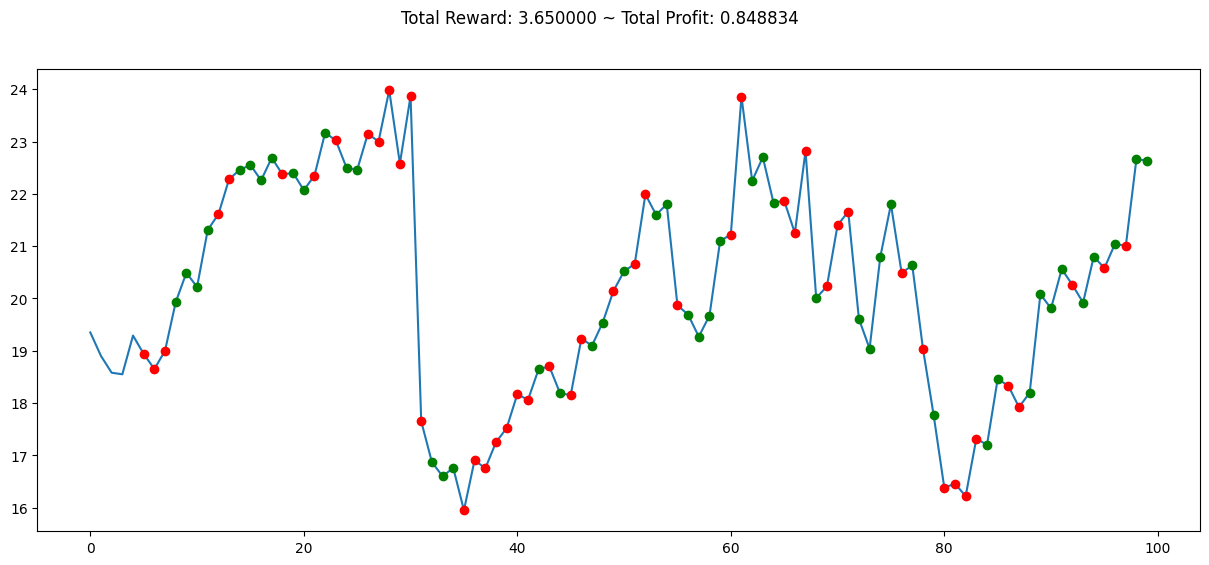

In [9]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state,reward , done , info = env.step(action)
  if done:
    print('info',info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()        

In [10]:
env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)
env= DummyVecEnv([env_maker])

In [11]:
model = A2C('MlpPolicy',env ,verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 301      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.633   |
|    explained_variance | 0.00497  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.559    |
|    value_loss         | 1.28     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 316      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0.753    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 1.28     |
|    value_loss      

In [26]:
env = gym.make('stocks-v0' , df=df, frame_bound =(50,100),window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action , _states = model.predict(obs)
  obs ,rewards , done , info = env.step(action)
  if done:
    print('info',info)
    break

info {'total_reward': 12.430000000000003, 'total_profit': 1.3887987536948243, 'position': 1}


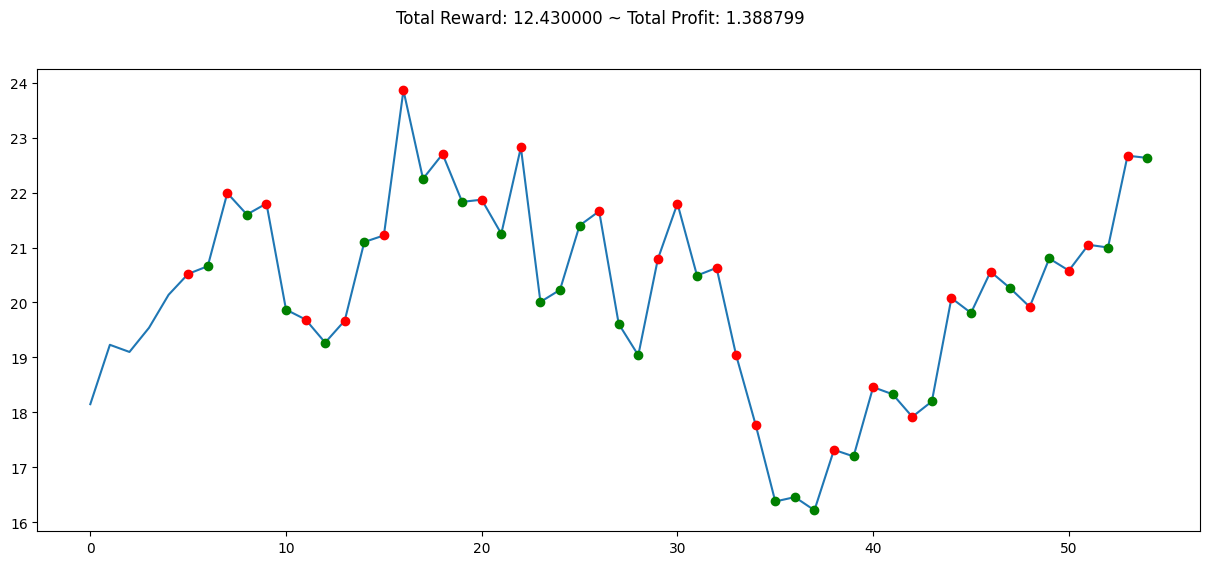

In [27]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()        